<a href="https://colab.research.google.com/github/samer-glitch/Navigating-Network-Complexity-Innovative-Strategies-for-Traffic-Analysis-and-Security-Optimization/blob/main/General%20Anomaly%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **General Anomaly Detection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv


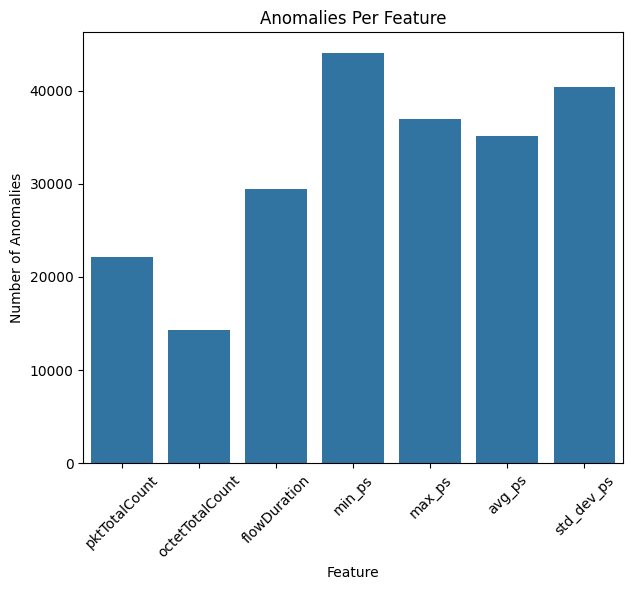

In [ ]:
# This code snippets implement anomaly detection and statistical analysis on network flow key features' data, ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
# offering insights into feature behavior and identifying outliers using Isolation Forest, KMeans clustering, and Interquartile Range methods.

# The selected features for anomaly detection—['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']—are crucial for capturing the essence of network traffic and its abnormalities.
# These metrics offer insights into traffic volume, flow duration, and packet size variations, which are key indicators of anomalous activities.
# High or low packet counts can signal attacks; changes in data volumes may point to unauthorized transfers;
# deviations in flow durations and packet sizes help identify unusual patterns potentially indicative of malicious behavior.
# This selection ensures a comprehensive analysis for effectively detecting anomalies.

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)
# Remove duplicated rows from the DataFrame
df_unique = df.drop_duplicates()

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
data = df[key_features]

# Handling NaN values by filling them with the median
data_filled = data.fillna(data.median())

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Dictionary to store anomaly predictions for each feature
feature_anomalies = {}
feature_predictions_dict = {}

# Standardizing and detecting anomalies for each feature individually
for feature in key_features:
    # Standardizing the feature
    feature_data = data_filled[[feature]].values  # Reshape for single feature
    feature_data_scaled = scaler.fit_transform(feature_data)

    # Training Isolation Forest on the feature
    isolation_forest.fit(feature_data_scaled)

    # Identifying anomalies
    feature_predictions = isolation_forest.predict(feature_data_scaled)
    feature_predictions_dict[feature] = feature_predictions
    feature_anomalies[feature] = np.sum(feature_predictions == -1)

# Aggregating anomaly labels per instance
anomalous_instances = np.zeros(len(data_filled), dtype=bool)
for feature in key_features:
    anomalous_instances = np.logical_or(anomalous_instances, feature_predictions_dict[feature] == -1)

# Counting the total number of anomalous instances
total_anomalous_instances = np.sum(anomalous_instances)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting anomalies per feature
plt.subplot(1, 2, 1)
sns.barplot(x=list(feature_anomalies.keys()), y=list(feature_anomalies.values()))
plt.title('Anomalies Per Feature')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Number of Anomalies')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

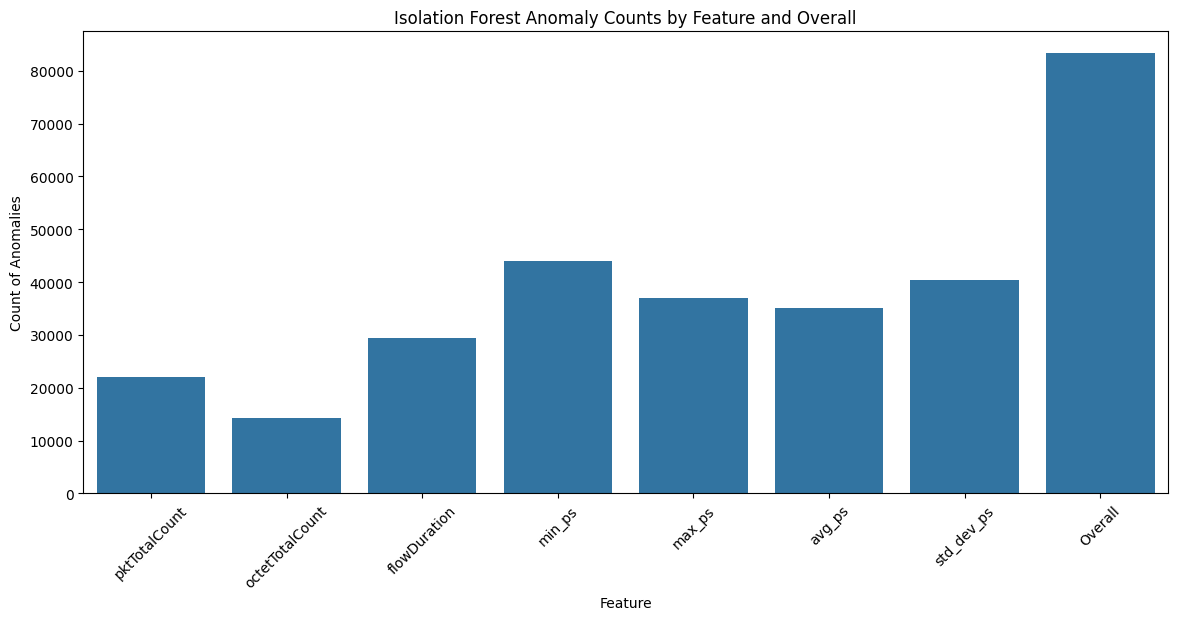

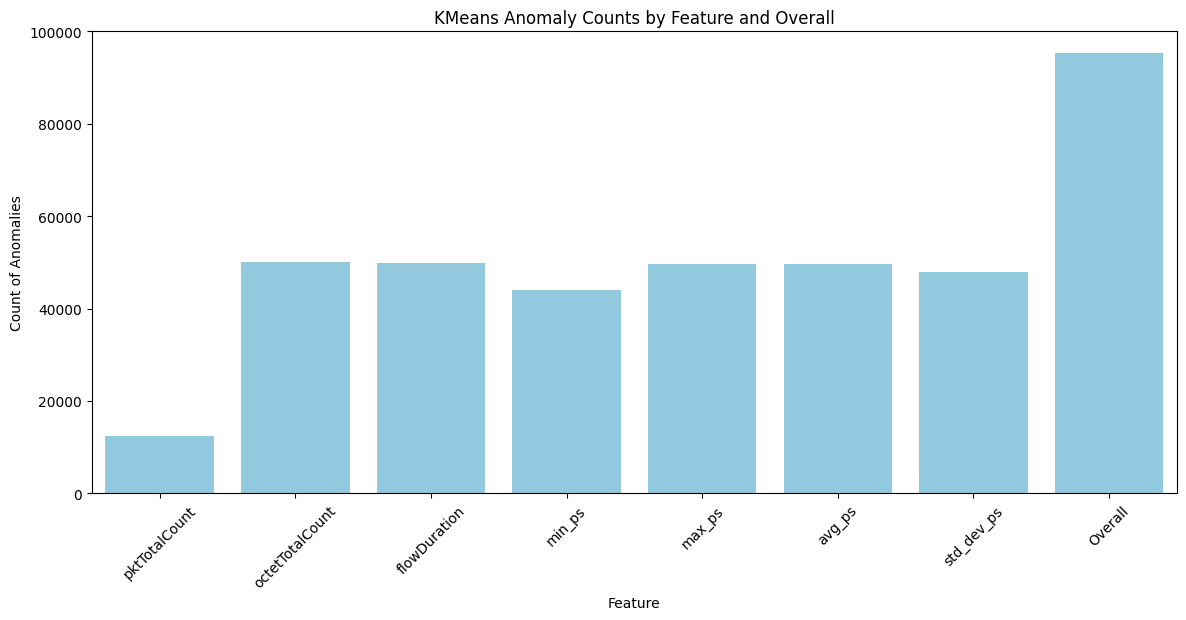

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)
# Remove duplicated rows from the DataFrame
df_unique = df.drop_duplicates()

# Defining the key features for anomaly detection
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values in the dataset
data_filled = df[key_features].fillna(df[key_features].median())

# Initializing dictionaries to store anomaly counts for each feature
if_anomaly_counts = {}
kmeans_anomaly_counts = {}

# Dictionary to store overall anomaly flags for each instance by model
if_overall_anomalies = np.zeros(len(df), dtype=bool)
kmeans_overall_anomalies = np.zeros(len(df), dtype=bool)

# Iterate over each feature to apply models
for feature in key_features:
    # Isolating the feature column
    feature_data = data_filled[[feature]].values

    # Normalizing and standardizing the feature data
    scaler = StandardScaler()
    feature_scaled = scaler.fit_transform(feature_data)

    # Isolation Forest
    isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42, n_jobs=-1)
    if_anomalies = isolation_forest.fit_predict(feature_scaled) == -1
    if_anomaly_counts[feature] = np.sum(if_anomalies)
    if_overall_anomalies |= if_anomalies

    # KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(feature_scaled)
    distances = kmeans.transform(feature_scaled)
    smallest_cluster = np.argmin(kmeans.cluster_centers_.sum(axis=1))
    threshold = np.percentile(distances[:, smallest_cluster], 75)
    kmeans_anomalies = distances[:, smallest_cluster] > threshold
    kmeans_anomaly_counts[feature] = np.sum(kmeans_anomalies)
    kmeans_overall_anomalies |= kmeans_anomalies

# Adding overall anomaly counts
if_anomaly_counts['Overall'] = np.sum(if_overall_anomalies)
kmeans_anomaly_counts['Overall'] = np.sum(kmeans_overall_anomalies)

# Plotting the anomaly counts for Isolation Forest
plt.figure(figsize=(14, 6))
sns.barplot(x=list(if_anomaly_counts.keys()), y=list(if_anomaly_counts.values()))
plt.title("Isolation Forest Anomaly Counts by Feature and Overall")
plt.ylabel("Count of Anomalies")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

# Plotting the anomaly counts for KMeans
plt.figure(figsize=(14, 6))
sns.barplot(x=list(kmeans_anomaly_counts.keys()), y=list(kmeans_anomaly_counts.values()), color='skyblue')
plt.title("KMeans Anomaly Counts by Feature and Overall")
plt.ylabel("Count of Anomalies")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df[key_features].describe())


       pktTotalCount  octetTotalCount   flowDuration         min_ps  \
count  100000.000000     1.000000e+05  100000.000000  100000.000000   
mean       87.446630     1.005419e+05      56.084909      55.859360   
std      1519.343184     1.856114e+06     198.289799      56.470964   
min         1.000000     2.900000e+01       0.000000      29.000000   
25%         2.000000     1.560000e+02       0.000608      40.000000   
50%         3.000000     2.930000e+02       0.124321      40.000000   
75%        23.000000     6.189250e+03      10.582892      65.000000   
max    294694.000000     2.881543e+08    1799.790347    1500.000000   

              max_ps         avg_ps     std_dev_ps  
count  100000.000000  100000.000000  100000.000000  
mean     1498.055790     254.667328     321.745548  
std      3679.095256     454.586764     718.330625  
min        29.000000      29.000000       0.000000  
25%        78.000000      69.000000       8.000000  
50%       156.000000     107.000000      4

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'statistical_analysis' is your DataFrame from df.describe()

# Define the specific features you're interested in
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Perform statistical analysis on these selected features
statistical_analysis = selected_data.describe()

# Function to print the statistics in a desired matrix format (e.g., 4x2)
def print_stats_in_matrix(df, matrix_shape=(4, 2)):
    total_features = len(key_features)
    features_per_block = matrix_shape[0] * matrix_shape[1]

    # Calculate how many blocks are needed
    num_blocks = int(np.ceil(total_features / features_per_block))

    for i in range(0, num_blocks):
        start_index = i * features_per_block
        end_index = start_index + features_per_block
        selected_keys = key_features[start_index:end_index]

        # Select the subset of features for the current block
        block_df = df[selected_keys].describe()

        print(f"Block {i+1}:\n", block_df, "\n\n")

# Example: Print the statistics in a 4x2 format
#print_stats_in_matrix(statistical_analysis, matrix_shape=(4, 2))

# Transpose the statistical analysis for a pivot-like view
transposed_statistical_analysis = statistical_analysis.T  # Transpose the DataFrame

# Print the transposed statistical analysis
transposed_statistical_analysis

,count,mean,std,min,25%,50%,75%,max
pktTotalCount,100000.0,87.446632,1.519343e+03,1.0,2.0,3.0,23.000000,294694.0
octetTotalCount,100000.0,100541.890625,1.856114e+06,29.0,156.0,293.0,6189.250000,288154304.0
flowDuration,100000.0,NaN,NaN,1.0,1.0,1.0,10.585938,1800.0
min_ps,100000.0,NaN,NaN,29.0,40.0,40.0,65.000000,1500.0
max_ps,100000.0,NaN,NaN,29.0,78.0,156.0,1458.000000,26320.0
avg_ps,100000.0,NaN,NaN,29.0,69.0,107.0,241.125000,7280.0
std_dev_ps,100000.0,NaN,NaN,1.0,8.0,41.5,421.750000,8400.0


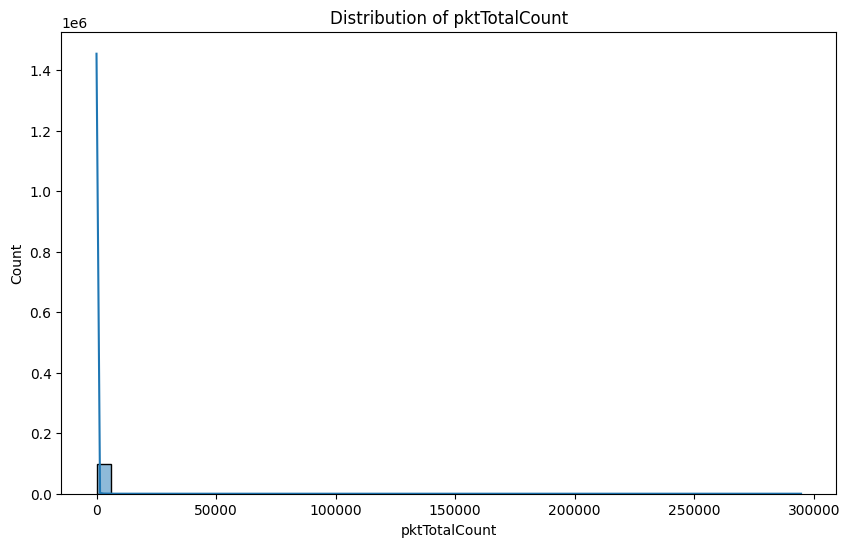

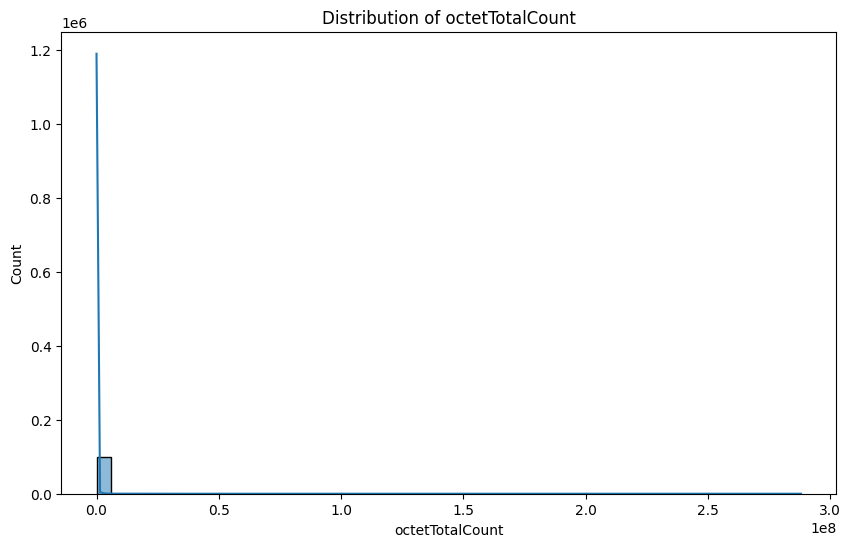

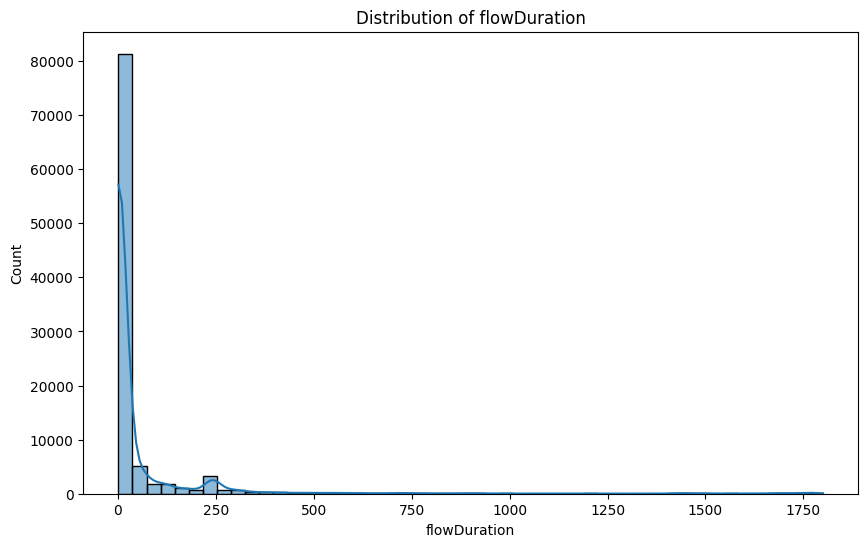

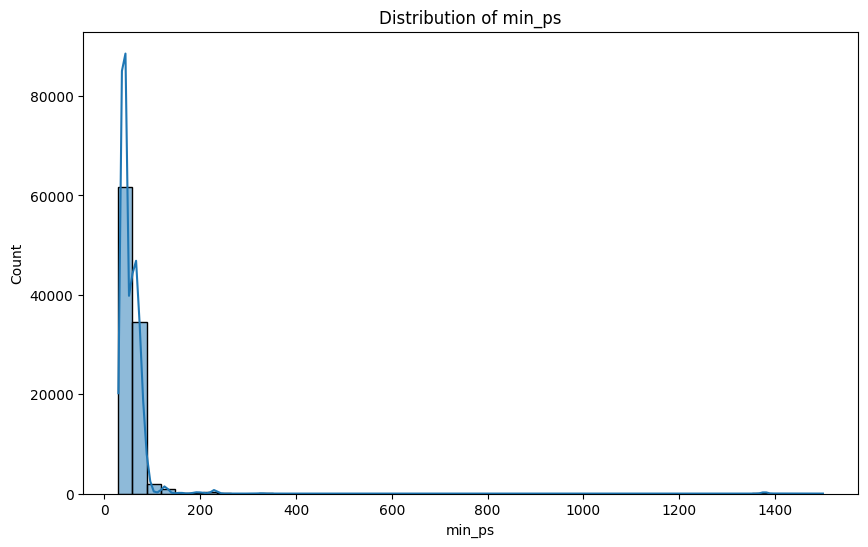

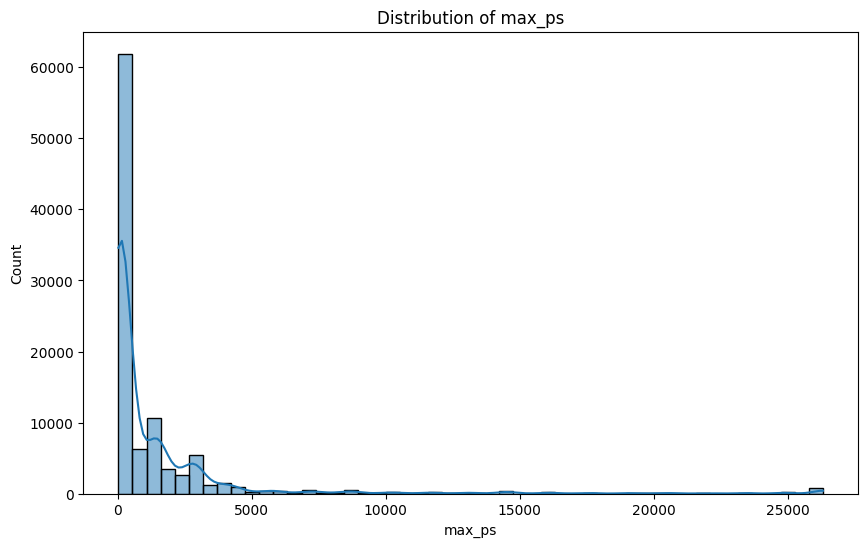

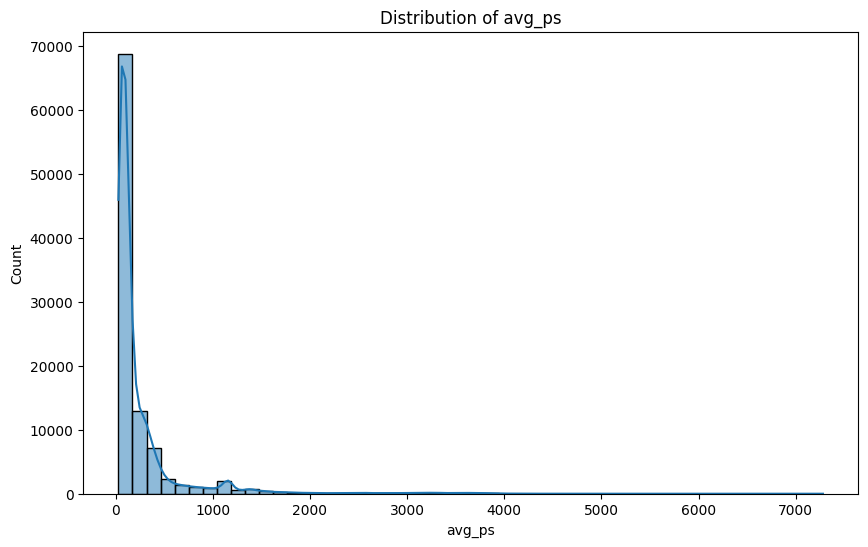

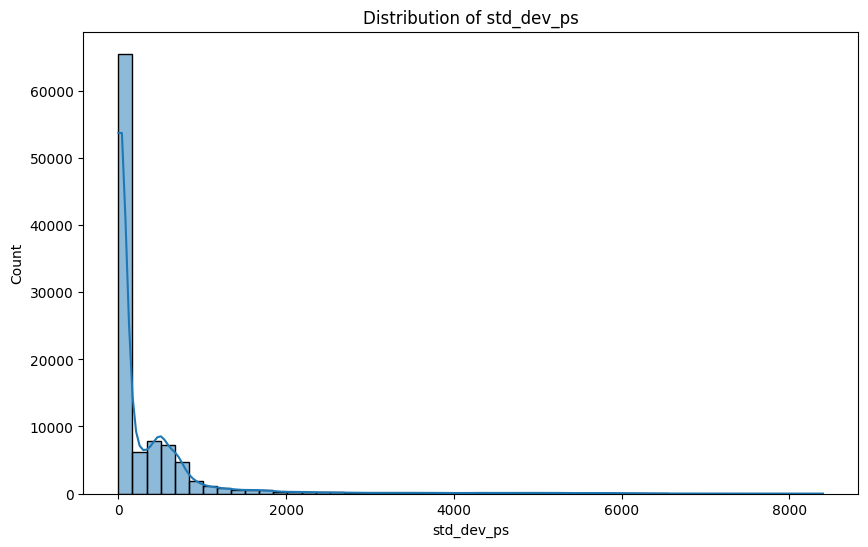

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each key feature
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(selected_data[feature], kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.show()


Feature: pktTotalCount, Anomalies detected: 10252, Percentage of anomalies: 5.13%
Feature: octetTotalCount, Anomalies detected: 10694, Percentage of anomalies: 5.35%
Feature: flowDuration, Anomalies detected: 20096, Percentage of anomalies: 10.05%
Feature: min_ps, Anomalies detected: 1769, Percentage of anomalies: 0.88%
Feature: max_ps, Anomalies detected: 8519, Percentage of anomalies: 4.26%
Feature: avg_ps, Anomalies detected: 10314, Percentage of anomalies: 5.16%
Feature: std_dev_ps, Anomalies detected: 6307, Percentage of anomalies: 3.15%


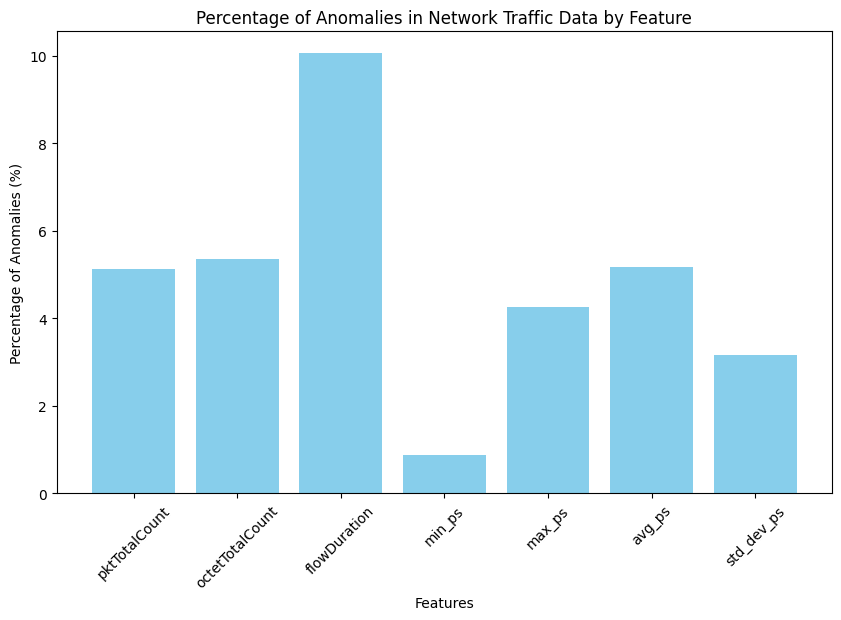

In [ ]:
# The anomalies detected in your dataset represent data points that fall outside the typical range defined by the Interquartile Range (IQR) method.
# Specifically, these anomalies are values that are either below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.
# This method is commonly used in statistical analysis to identify outliers that might be due to variability in the measurement or may indicate experimental errors.
# In the context of network traffic data, anomalies could represent unusual traffic patterns, potential security threats like DDoS attacks, or data collection errors.

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)
# Remove duplicated rows from the DataFrame
df_unique = df.drop_duplicates()

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Total number of instances in the dataset
total_instances = len(df)  # Assuming df has 100,000 instances

anomalies_counts = {}
anomalies_percentages = {}

for feature in key_features:
    # Calculating boxplot stats
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifying anomalies
    anomalies = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Counting anomalies and calculating their percentage
    anomalies_count = len(anomalies)
    anomalies_percentage = (anomalies_count / total_instances) * 100

    anomalies_counts[feature] = anomalies_count
    anomalies_percentages[feature] = anomalies_percentage

# Print out the anomalies count and their percentage for each feature
for feature in key_features:
    print(f"Feature: {feature}, Anomalies detected: {anomalies_counts[feature]}, Percentage of anomalies: {anomalies_percentages[feature]:.2f}%")
import matplotlib.pyplot as plt

# Features and their corresponding anomalies percentages
features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
anomalies_percentages = [5.13, 5.35, 10.05, 0.88, 4.26, 5.16, 3.15]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, anomalies_percentages, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Percentage of Anomalies (%)')
plt.title('Percentage of Anomalies in Network Traffic Data by Feature')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

# High Anomaly Rates (e.g., flowDuration): Features with relatively high percentages of anomalies might indicate features that are more prone to unusual behavior or measurement errors.
# In network traffic data,
# a high anomaly rate in flowDuration could suggest periods of network congestion or attacks that cause delays in packet transmission.
# Low Anomaly Rates (e.g., min_ps): Features with lower percentages of anomalies might be more stable or less variable under normal conditions.
# A low anomaly rate in min_ps (minimum packet size) could indicate that packet sizes are generally consistent and follow expected patterns.

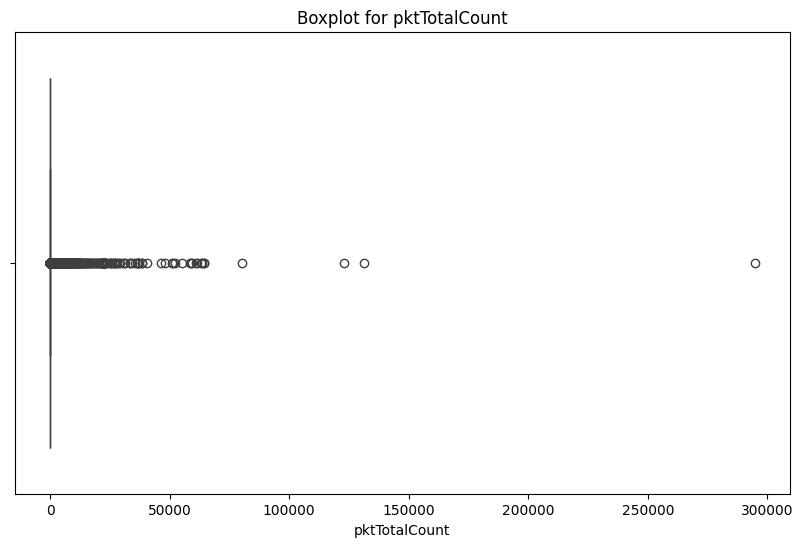

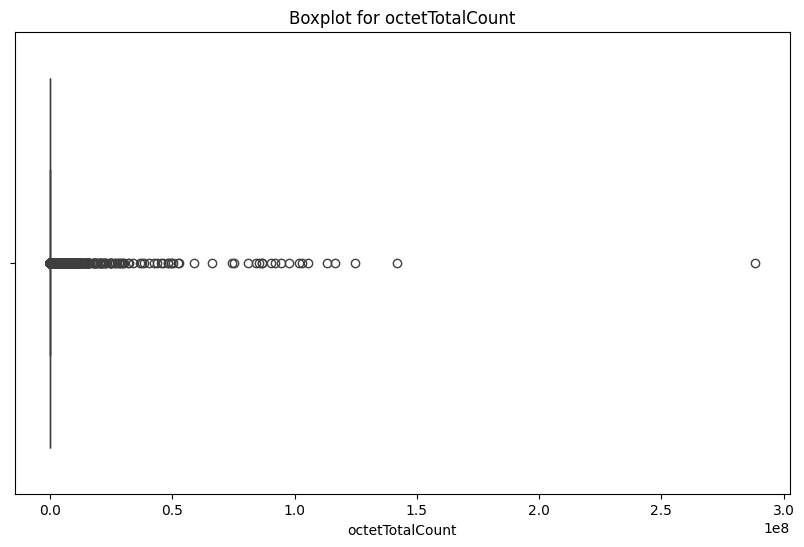

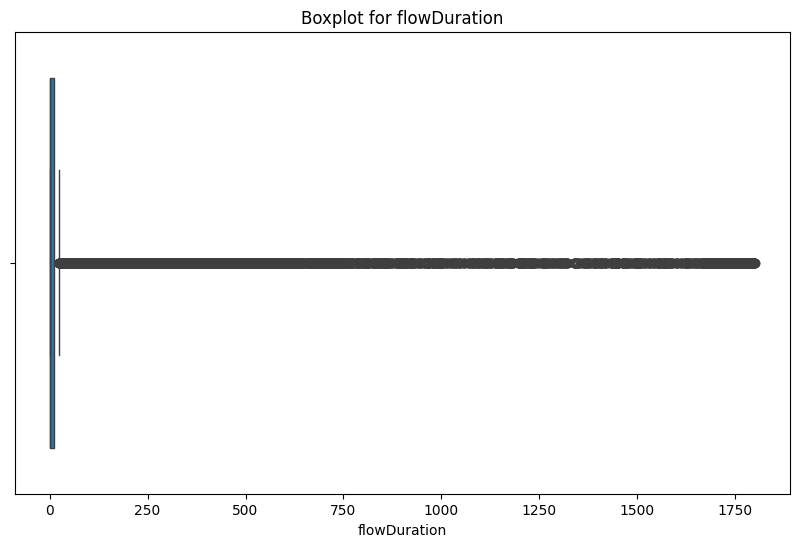

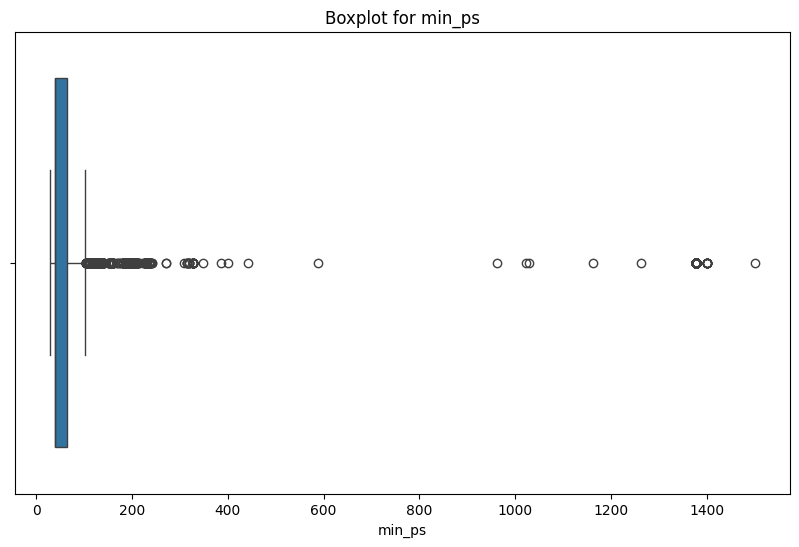

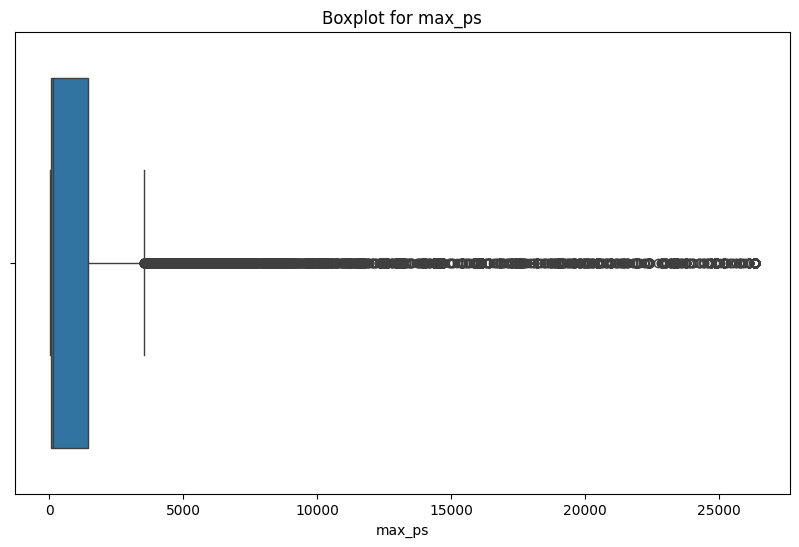

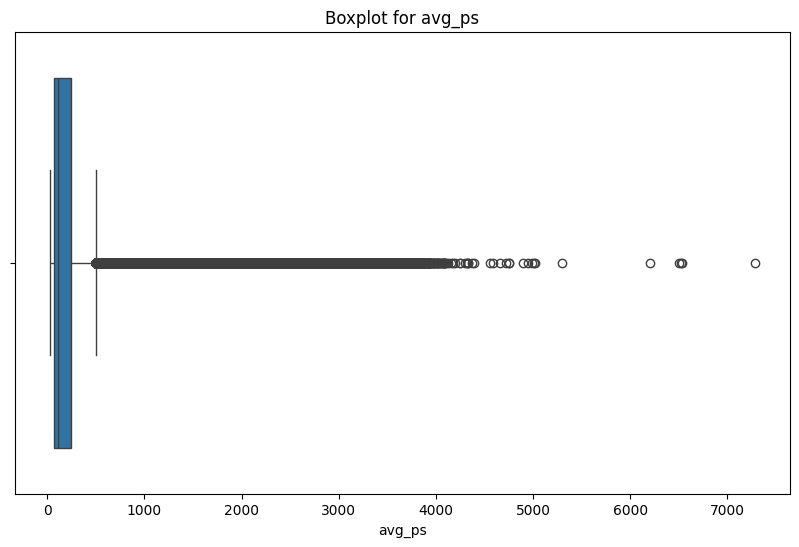

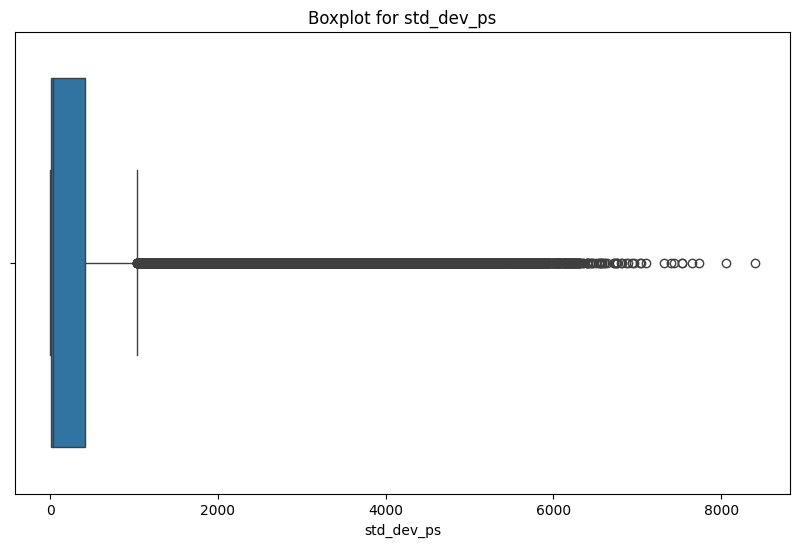

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'selected_data' is your DataFrame with the key features selected
for feature in ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=selected_data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [ ]:
# Assuming 'selected_data' is your DataFrame with the key features selected
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = (selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 + 1.5 * IQR))

# Print out the outliers for each feature
for feature in selected_data.columns:
    print(f"{feature} Outliers:\n", selected_data[feature][outliers[feature]], "\n")


pktTotalCount Outliers:
 5         75.0
6        106.0
25        72.0
26       755.0
76        85.0
         ...  
99921     91.0
99965     58.0
99969     74.0
99970    118.0
99992     78.0
Name: pktTotalCount, Length: 10252, dtype: float32 

octetTotalCount Outliers:
 5        24919.0
6        37566.0
15       74607.0
17       29279.0
18       44261.0
          ...   
99914    41649.0
99917    25236.0
99918    43336.0
99919    44318.0
99921    16392.0
Name: octetTotalCount, Length: 10694, dtype: float32 

flowDuration Outliers:
 0        1701.00
1        1701.00
2        1451.00
3        1451.00
5        1757.00
          ...   
99970     752.00
99980     240.25
99987      91.25
99992     256.25
99996     240.25
Name: flowDuration, Length: 20217, dtype: float16 

min_ps Outliers:
 0        328.0
1        328.0
2        328.0
3        328.0
5        318.0
         ...  
99460    202.0
99687    237.0
99688    237.0
99904    237.0
99905    237.0
Name: min_ps, Length: 1769, dtype: float16